In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
from calcTI import *

In [3]:
# importing raw data
raw_df = pd.read_csv(r'..\\raw_data_30M\\currency_pairs\\GBPJPY_M30.csv', sep='\t')

In [4]:
raw_df = raw_df[-100000:]

In [5]:
raw_df = raw_df[-100000:]
raw_df.reset_index(inplace=True)
raw_df = raw_df.drop(['index', 'Time'], axis=1)

In [6]:
raw_df = ema_n(raw_df, 200)
raw_df = ema_n(raw_df, 100)

In [7]:
raw_df = vwap(raw_df)

In [8]:
raw_df

,Open,High,Low,Close,Volume,EMA_200,EMA_100,VWAP
0,177.783,177.988,177.743,177.983,3148,177.983,177.983,177.905
1,177.983,178.113,177.802,177.847,3861,177.982,177.980,177.913
2,177.845,177.982,177.732,177.841,3443,177.980,177.978,177.893
3,177.844,178.021,177.799,178.005,2756,177.980,177.978,177.903
4,177.996,178.272,177.947,178.243,2596,177.983,177.983,177.969
...,...,...,...,...,...,...,...,...
99995,158.498,158.626,158.465,158.555,2379,158.762,158.763,158.484
99996,158.553,158.590,158.478,158.484,2185,158.759,158.758,158.517
99997,158.480,158.527,158.412,158.450,2411,158.756,158.752,158.509
99998,158.449,158.462,158.370,158.426,1599,158.753,158.745,158.471


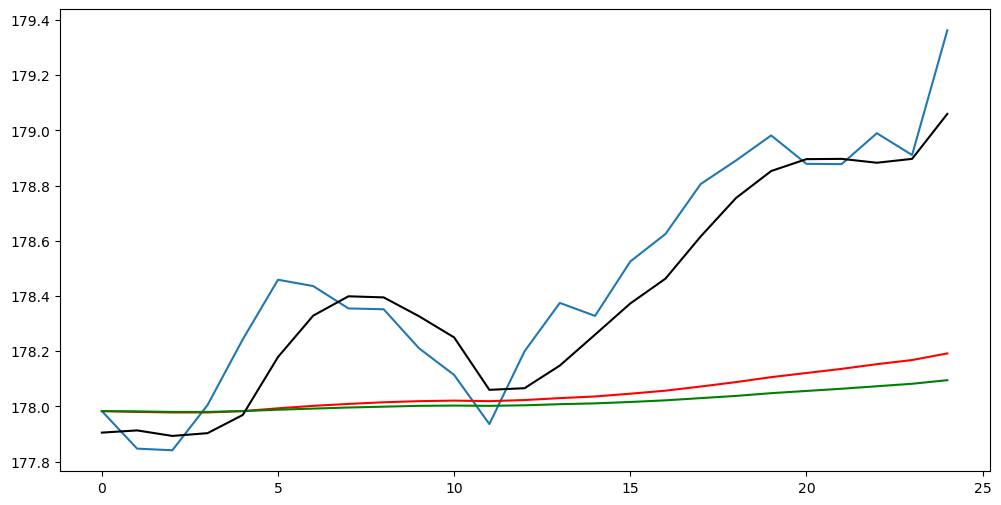

In [9]:
dx = raw_df[:25]
plt.figure(figsize=(12,6))
plt.plot(dx.Close)
plt.plot(dx.EMA_100, 'red')
plt.plot(dx.EMA_200, 'green')
plt.plot(dx.VWAP, 'black')


In [10]:
# Defining what an uptrend or downtrend is
raw_df['Trend'] = [1 if (row['Close'] > row['EMA_200'] + 0.00125 * row['Close']) and (row['Close'] > row['EMA_100'] + 0.001 * row['Close']) and (row['Close'] > row['VWAP'] + 0.0005 * row['Close'])
                        else -1 if row['Close'] < row['EMA_200'] - 0.00125 * row['Close'] and (row['Close'] < row['EMA_100'] + 0.001 * row['Close']) and (row['Close'] < row['VWAP'] + 0.0005 * row['Close'])
                        else 0 
                        for index, row in raw_df.iterrows()]


In [11]:
raw_df

,Open,High,Low,Close,Volume,EMA_200,EMA_100,VWAP,Trend
0,177.783,177.988,177.743,177.983,3148,177.983,177.983,177.905,0
1,177.983,178.113,177.802,177.847,3861,177.982,177.980,177.913,0
2,177.845,177.982,177.732,177.841,3443,177.980,177.978,177.893,0
3,177.844,178.021,177.799,178.005,2756,177.980,177.978,177.903,0
4,177.996,178.272,177.947,178.243,2596,177.983,177.983,177.969,1
...,...,...,...,...,...,...,...,...,...
99995,158.498,158.626,158.465,158.555,2379,158.762,158.763,158.484,-1
99996,158.553,158.590,158.478,158.484,2185,158.759,158.758,158.517,-1
99997,158.480,158.527,158.412,158.450,2411,158.756,158.752,158.509,-1
99998,158.449,158.462,158.370,158.426,1599,158.753,158.745,158.471,-1


In [140]:
raw_df.to_csv('..\\pre_processed_data\\bot_df\\GBPJPY_M30.csv')

In [12]:
final_df = raw_df.drop(['Open', 'High', 'Low', 'Volume'], axis=1)

In [142]:
final_df.to_csv('..\\final_data\\bot_df\\GBPJPY_M30.csv')

In [2]:
final_df = pd.read_csv('..\\final_data\\bot_df\\GBPJPY_M30.csv')

In [3]:
final_df = final_df.drop('Unnamed: 0', axis=1)

In [4]:
final_df

,Close,EMA_200,EMA_100,VWAP,Trend
0,177.983,177.983,177.983,177.905,0
1,177.847,177.982,177.980,177.913,0
2,177.841,177.980,177.978,177.893,0
3,178.005,177.980,177.978,177.903,0
4,178.243,177.983,177.983,177.969,1
...,...,...,...,...,...
99995,158.555,158.762,158.763,158.484,-1
99996,158.484,158.759,158.758,158.517,-1
99997,158.450,158.756,158.752,158.509,-1
99998,158.426,158.753,158.745,158.471,-1


In [14]:
final_df.dtypes

Close      float64
EMA_200    float64
EMA_100    float64
VWAP       float64
Trend        int64
dtype: object

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

In [6]:
x0=[]
x1=[]
x2=[]
x3=[]
y=[]

In [7]:
for i in range (0, final_df.shape[0] - 200):
    x0.append(final_df.iloc[i:i+200, 0])
    x1.append(final_df.iloc[i:i+200, 1])
    x2.append(final_df.iloc[i:i+200, 2])
    x3.append(final_df.iloc[i:i+200, 3])
    y.append(final_df.iloc[i+200, 4])
# maybe also try with 400 or 2000 instead of 200

In [8]:
x0, x1, x2, x3, y = np.array(x0), np.array(x1), np.array(x2), np.array(x3), np.array(y)

In [9]:
y=np.reshape(y, (len(y), 1))

In [10]:
x0 = scaler.fit_transform(x0)
x1 = scaler.fit_transform(x1)
x2 = scaler.fit_transform(x2)
x3 = scaler.fit_transform(x3)

In [11]:
X = np.stack([x0, x1, x2, x3], axis=2)

In [12]:
X

array([[[1.70189065, 1.70308434, 1.70244364, 1.69694275],
        [1.69319736, 1.70305512, 1.70228626, 1.69749016],
        [1.69284621, 1.70296163, 1.70219308, 1.69624076],
        ...,
        [1.98933341, 1.87806654, 1.92209944, 1.98854451],
        [1.99202582, 1.87927187, 1.92356449, 1.99020672],
        [1.9904049 , 1.88041285, 1.92496525, 1.99116092]],

       [[1.69316333, 1.70302008, 1.70225099, 1.69745613],
        [1.69281233, 1.7029266 , 1.70215783, 1.69620669],
        [1.70337061, 1.70296163, 1.70219308, 1.6968825 ],
        ...,
        [1.99197297, 1.87922666, 1.92351649, 1.99015402],
        [1.99035192, 1.88036756, 1.92491716, 1.99110807],
        [1.98770086, 1.88150855, 1.92618911, 1.99090338]],

       [[1.6927783 , 1.70289155, 1.70212256, 1.69617268],
        [1.70333659, 1.7029266 , 1.70215783, 1.69684843],
        [1.71864383, 1.70315442, 1.70251416, 1.701118  ],
        ...,
        [1.9902991 , 1.88032233, 1.92486914, 1.99105535],
        [1.98764793, 1.881463

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import CuDNNLSTM, Dense, Dropout
from keras import optimizers

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [15]:
X_train.shape

(79840, 200, 4)

In [16]:
X_train

array([[[-0.59121352, -0.55285125, -0.56038241, -0.59074705],
        [-0.58613988, -0.55323197, -0.56095549, -0.58978036],
        [-0.5820928 , -0.55348417, -0.56140015, -0.58573327],
        ...,
        [-0.74808619, -0.62025754, -0.63748671, -0.73912183],
        [-0.7204655 , -0.62128495, -0.63915799, -0.73487117],
        [-0.7234896 , -0.6223124 , -0.64082934, -0.73216552]],

       [[ 0.20586061,  0.2238255 ,  0.21778111,  0.2039667 ],
        [ 0.20375742,  0.22364797,  0.21753957,  0.20449457],
        [ 0.2032585 ,  0.22347042,  0.21723379,  0.20431657],
        ...,
        [ 0.23350921,  0.22959674,  0.2320048 ,  0.23340762],
        [ 0.23500976,  0.22967909,  0.23202337,  0.23381364],
        [ 0.23490087,  0.229697  ,  0.23210638,  0.23447726]],

       [[-0.69029431, -0.69904848, -0.68579529, -0.68905951],
        [-0.68868727, -0.69891704, -0.68585633, -0.69014766],
        [-0.69413916, -0.69891414, -0.6860458 , -0.6913    ],
        ...,
        [-0.609992  , -0.63

In [40]:
X_train.shape

(79840, 200, 4)

In [83]:
model = Sequential()

In [64]:
# model.add(CuDNNLSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
# model.add(CuDNNLSTM(64, return_sequences=False))
# model.add(Dense(64, activation='tanh'))
# model.add(Dense(1))

In [84]:
model.add(CuDNNLSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

model.add(CuDNNLSTM(64, return_sequences=True))
model.add(Dropout(0.2))

model.add(CuDNNLSTM(64, return_sequences=True))
model.add(Dropout(0.2))

model.add(CuDNNLSTM(64, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dense(1))

In [85]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [86]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 cu_dnnlstm_12 (CuDNNLSTM)   (None, 200, 64)           17920     
                                                                 
 dropout_12 (Dropout)        (None, 200, 64)           0         
                                                                 
 cu_dnnlstm_13 (CuDNNLSTM)   (None, 200, 64)           33280     
                                                                 
 dropout_13 (Dropout)        (None, 200, 64)           0         
                                                                 
 cu_dnnlstm_14 (CuDNNLSTM)   (None, 200, 64)           33280     
                                                                 
 dropout_14 (Dropout)        (None, 200, 64)           0         
                                                                 
 cu_dnnlstm_15 (CuDNNLSTM)   (None, 64)               

In [87]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

In [88]:
model.fit(X_train, y_train, validation_split=0.2, epochs=40, batch_size=512, callbacks=[es])

Epoch 1/40
125/125 [==============================] - 15s 95ms/step - loss: 0.2771 - mae: 0.4115 - val_loss: 0.2316 - val_mae: 0.3730
Epoch 2/40
125/125 [==============================] - 11s 85ms/step - loss: 0.2305 - mae: 0.3712 - val_loss: 0.2213 - val_mae: 0.3708
Epoch 3/40
125/125 [==============================] - 11s 86ms/step - loss: 0.2175 - mae: 0.3610 - val_loss: 0.2114 - val_mae: 0.3662
Epoch 4/40
125/125 [==============================] - 11s 86ms/step - loss: 0.2067 - mae: 0.3527 - val_loss: 0.1959 - val_mae: 0.3370
Epoch 5/40
125/125 [==============================] - 11s 86ms/step - loss: 0.2055 - mae: 0.3520 - val_loss: 0.2002 - val_mae: 0.3499
Epoch 6/40
125/125 [==============================] - 11s 85ms/step - loss: 0.1958 - mae: 0.3431 - val_loss: 0.1878 - val_mae: 0.3467
Epoch 7/40
125/125 [==============================] - 11s 86ms/step - loss: 0.1937 - mae: 0.3426 - val_loss: 0.1820 - val_mae: 0.3297
Epoch 8/40
125/125 [==============================] - 11s 86ms

In [89]:
model.save('..\\models\\bot\\bot-multi-3-relu.hdf5')

In [73]:
model = keras.models.load_model('..\\models\\bot\\bot-multi-1.hdf5')

In [90]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.14604343473911285
Test accuracy: 0.2653700113296509


In [91]:
predictions = model.predict(X_test)

624/624 [==============================] - 9s 13ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

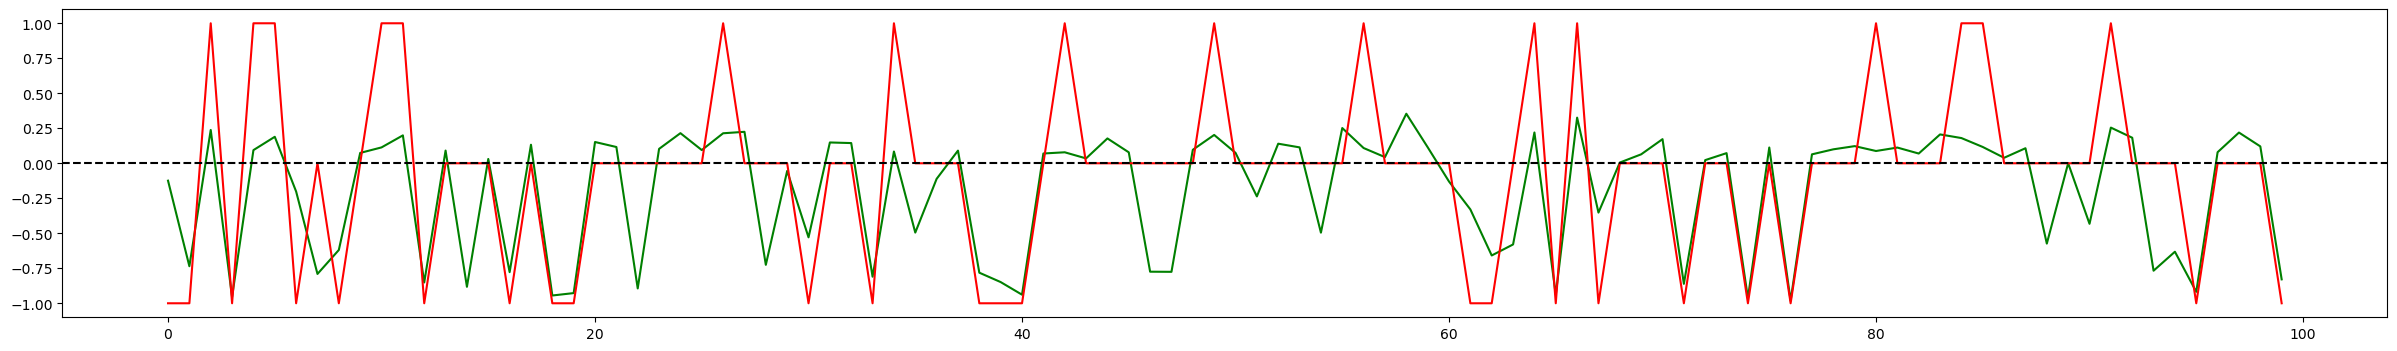

In [93]:
plt.figure(figsize=(30,4))
plt.plot(predictions[:100], 'g')
plt.plot((y_test[:100]),  'r')
plt.axhline(y=0, color='black', linestyle='--')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

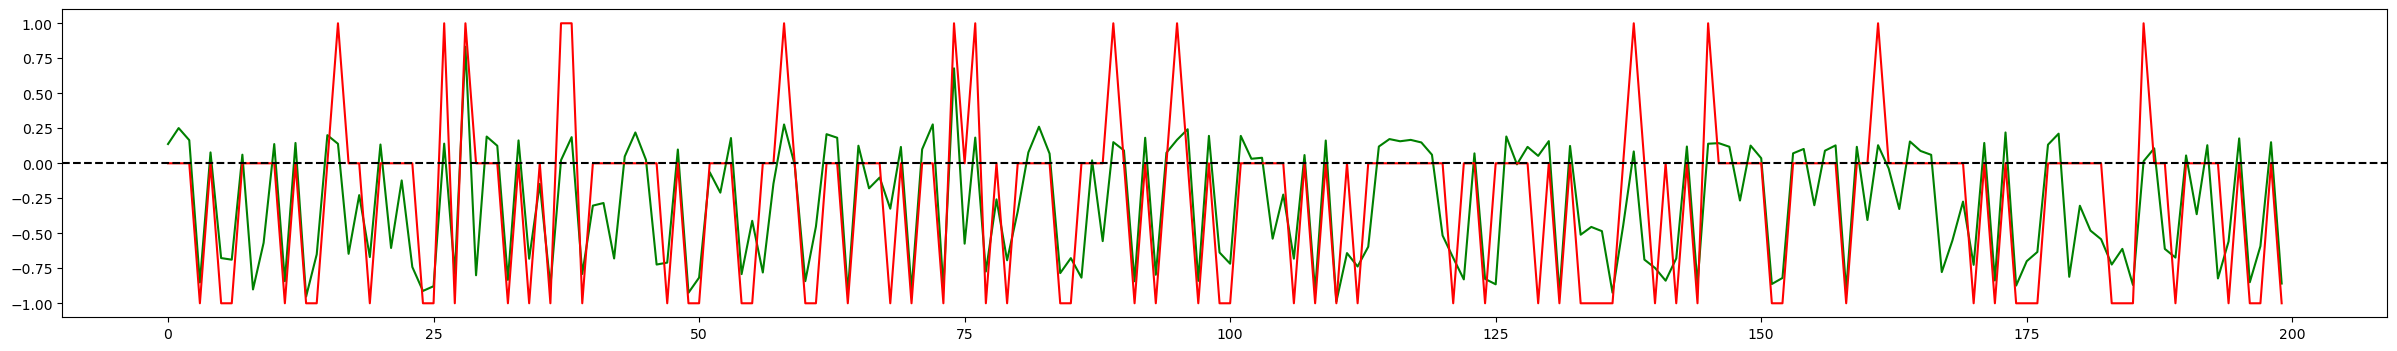

In [68]:
plt.figure(figsize=(30,4))
plt.plot(predictions[6000:6200], 'g')
plt.plot((y_test[6000:6200]),  'r')
plt.axhline(y=0, color='black', linestyle='--')
plt.show